# Imports & Configuration

In [1]:
import cv2
print(f"OpenCV Version: {cv2.__version__}")
print(f"Has BRISK: {hasattr(cv2, 'BRISK_create')}")
try:
    print(f"Has DAISY: {hasattr(cv2.xfeatures2d, 'DAISY_create')}")
except AttributeError:
    print("Has DAISY: False (xfeatures2d not found)")

OpenCV Version: 4.9.0
Has BRISK: True
Has DAISY: True


In [2]:
import SimpleITK as sitk
import numpy as np
import glob
import os
import tifffile
import matplotlib.pyplot as plt
from IPython.display import clear_output
import config
import re


DATA_BASE_PATH = os.path.join(config.DATASPACE, "TMA_Cores_Grouped_NEW")
WORK_OUTPUT= os.path.join(config.DATASPACE, "Registered")
TARGET_CORE = "Core_11" 

INPUT_FOLDER = os.path.join(DATA_BASE_PATH, TARGET_CORE)
OUTPUT_FOLDER =  os.path.join(WORK_OUTPUT, TARGET_CORE)
os.makedirs(OUTPUT_FOLDER, exist_ok=True)


def get_slice_number(filename):
    # Matches "TMA_" followed by digits, captures the digits
    match = re.search(r"TMA_(\d+)_", os.path.basename(filename))
    if match:
        return int(match.group(1))
    return 0 # Fallback if no number found

# Get file list and sort using the custom key
raw_files = glob.glob(os.path.join(INPUT_FOLDER, "*.ome.tif"))
file_list = sorted(raw_files, key=get_slice_number)


# Get sorted file list
print(f"Found {len(file_list)} files in {INPUT_FOLDER}:")
for i, f in enumerate(file_list):
    print(f"[{i}] {os.path.basename(f)}")


Found 20 files in /data3/junming/3D-TMA-Register/TMA_Cores_Grouped_NEW/Core_11:
[0] 240919_3D_BL_TMA_1_Core11.ome.tif
[1] 240919_3D_BL_TMA_2_Core11.ome.tif
[2] 240919_3D_BL_TMA_3_Core11.ome.tif
[3] 240919_3D_BL_TMA_4_Core11.ome.tif
[4] 240919_3D_BL_TMA_5_Core11.ome.tif
[5] 240919_3D_BL_TMA_6_Core11.ome.tif
[6] 240919_3D_BL_TMA_7_Core11.ome.tif
[7] 240919_3D_BL_TMA_8_Core11.ome.tif
[8] 240919_3D_BL_TMA_9_Core11.ome.tif
[9] 240919_3D_BL_TMA_10_Core11.ome.tif
[10] 240919_3D_BL_TMA_11_Core11.ome.tif
[11] 240919_3D_BL_TMA_12_Core11.ome.tif
[12] 240919_3D_BL_TMA_13_Core11.ome.tif
[13] 240919_3D_BL_TMA_14_Core11.ome.tif
[14] 240919_3D_BL_TMA_15_Core11.ome.tif
[15] 240919_3D_BL_TMA_16_Core11.ome.tif
[16] 240919_3D_BL_TMA_17_Core11.ome.tif
[17] 240919_3D_BL_TMA_18_Core11.ome.tif
[18] 240919_3D_BL_TMA_19_Core11.ome.tif
[19] 240919_3D_BL_TMA_20_Core11.ome.tif


# VALIS registration

In [ ]:
from valis import registration
import os


# 1. Initialize VALIS
# It will automatically detect your GPU and use the patched code.
vls = registration.Valis(INPUT_FOLDER, 
                         OUTPUT_FOLDER, 
                         imgs_ordered=True) # Tells VALIS this is a Z-stack

# 2. Register (Deep Learning on GPU)
print("Starting registration")
vls.register() 

# 3. Warp and Save
# Corrected line for VALIS 1.2.0
vls.warp_and_save_slides(OUTPUT_FOLDER, crop="reference")

# 4. Cleanup
registration.kill_jvm()

print("Processing complete!")

/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loaded LightGlue model
Loaded LightGlue model
Starting registration

==== Converting images



Converting images: 100%|██████████| 20/20 [00:40<00:00,  2.04s/image]



==== Processing images



Normalizing images: 100%|██████████| 20/20 [00:00<00:00, 23.03image/s]



==== Rigid registration



Detecting features   :   0%|          | 0/20 [00:00<?, ?image/s]

detecting features in level 0 with image shape (512, 511)


Detecting features   :   5%|▌         | 1/20 [00:00<00:15,  1.26image/s]

detecting features in level 0 with image shape (512, 511)


Detecting features   :  10%|█         | 2/20 [00:01<00:14,  1.21image/s]

detecting features in level 0 with image shape (512, 511)


Detecting features   :  15%|█▌        | 3/20 [00:02<00:14,  1.20image/s]

detecting features in level 0 with image shape (512, 511)


Detecting features   :  20%|██        | 4/20 [00:03<00:13,  1.18image/s]

detecting features in level 0 with image shape (512, 511)


Detecting features   :  25%|██▌       | 5/20 [00:04<00:12,  1.16image/s]

detecting features in level 0 with image shape (512, 511)


Detecting features   :  30%|███       | 6/20 [00:05<00:11,  1.18image/s]

detecting features in level 0 with image shape (512, 511)


Detecting features   :  35%|███▌      | 7/20 [00:05<00:11,  1.16image/s]

detecting features in level 0 with image shape (512, 511)


Detecting features   :  40%|████      | 8/20 [00:06<00:10,  1.15image/s]

detecting features in level 0 with image shape (512, 511)


Detecting features   :  45%|████▌     | 9/20 [00:07<00:09,  1.14image/s]

detecting features in level 0 with image shape (512, 511)


Detecting features   :  50%|█████     | 10/20 [00:08<00:08,  1.14image/s]

detecting features in level 0 with image shape (512, 511)


Detecting features   :  55%|█████▌    | 11/20 [00:09<00:07,  1.17image/s]

detecting features in level 0 with image shape (512, 511)


Detecting features   :  60%|██████    | 12/20 [00:10<00:06,  1.15image/s]

detecting features in level 0 with image shape (512, 511)


Detecting features   :  65%|██████▌   | 13/20 [00:11<00:06,  1.15image/s]

detecting features in level 0 with image shape (512, 511)


Detecting features   :  70%|███████   | 14/20 [00:12<00:05,  1.14image/s]

detecting features in level 0 with image shape (512, 511)


Detecting features   :  75%|███████▌  | 15/20 [00:12<00:04,  1.13image/s]

detecting features in level 0 with image shape (512, 511)


Detecting features   :  80%|████████  | 16/20 [00:13<00:03,  1.12image/s]

detecting features in level 0 with image shape (512, 511)


Detecting features   :  85%|████████▌ | 17/20 [00:14<00:02,  1.11image/s]

detecting features in level 0 with image shape (512, 511)


Detecting features   :  90%|█████████ | 18/20 [00:15<00:01,  1.12image/s]

detecting features in level 0 with image shape (512, 511)


Detecting features   :  95%|█████████▌| 19/20 [00:16<00:00,  1.11image/s]

detecting features in level 0 with image shape (512, 511)


Detecting features   : 100%|██████████| 20/20 [00:17<00:00,  1.14image/s]
/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/feature_matcher.py:255: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `SimilarityTransform.from_estimate` class constructor instead.
  tform.estimate(src=dst_xy, dst=src_xy)
/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/feature_matcher.py:255: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `SimilarityTransform.from_estimate` class constructor instead.
  tform.estimate(src=dst_xy, dst=src_xy)
/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/feature_matcher.py:255: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `SimilarityTransform.from_estimate` class constructor instead.
  tform.estimate(src=dst_xy, dst=src_xy)
/h

Images sorted using VggFD features. Will now use LightGlueMatcher to match images using DiskFD features
detecting features in level 0 with image shape (512, 511)


Re-matching images:   0%|          | 0/19 [00:00<?, ?image/s]/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/serial_rigid.py:860: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `SimilarityTransform.from_estimate` class constructor instead.
  rotation_tform.estimate(fixed_kp_xy, moving_kp_xy)
/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/warp_tools.py:1157: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `ProjectiveTransform.from_estimate` class constructor instead.
  M_tform.estimate(warped_corners, img_corners_xy)


detecting features in level 0 with image shape (544, 543)


Re-matching images:   5%|▌         | 1/19 [00:00<00:05,  3.04image/s]

detecting features in level 0 with image shape (554, 553)
detecting features in level 0 with image shape (548, 547)


Re-matching images:  16%|█▌        | 3/19 [00:00<00:02,  6.93image/s]

detecting features in level 0 with image shape (547, 548)
detecting features in level 0 with image shape (568, 567)


Re-matching images:  26%|██▋       | 5/19 [00:00<00:01,  9.17image/s]

detecting features in level 0 with image shape (553, 550)
detecting features in level 0 with image shape (564, 562)


Re-matching images:  37%|███▋      | 7/19 [00:00<00:01, 10.94image/s]

detecting features in level 0 with image shape (569, 562)
detecting features in level 0 with image shape (562, 558)


Re-matching images:  47%|████▋     | 9/19 [00:00<00:00, 11.37image/s]

detecting features in level 0 with image shape (579, 578)
detecting features in level 0 with image shape (516, 516)


Re-matching images:  58%|█████▊    | 11/19 [00:01<00:00, 11.23image/s]

detecting features in level 0 with image shape (585, 584)
detecting features in level 0 with image shape (582, 578)


Re-matching images:  68%|██████▊   | 13/19 [00:01<00:00, 11.95image/s]

detecting features in level 0 with image shape (557, 551)
detecting features in level 0 with image shape (557, 553)


Re-matching images:  79%|███████▉  | 15/19 [00:01<00:00, 12.81image/s]

detecting features in level 0 with image shape (549, 545)
detecting features in level 0 with image shape (573, 567)


Re-matching images:  89%|████████▉ | 17/19 [00:01<00:00, 13.14image/s]

detecting features in level 0 with image shape (563, 567)
detecting features in level 0 with image shape (572, 568)


  0%|          | 0/19 [00:00<?, ?it/s]/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/serial_rigid.py:939: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `SimilarityTransform.from_estimate` class constructor instead.
  error_estimator.estimate(kp1, kp2)


When matching 240919_3D_BL_TMA_10_Core11 to 240919_3D_BL_TMA_11_Core11, the results are better when using LightGlueMatcher using DiskFD features. Number of matches: LightGlueMatcher using DiskFD features = 1448, VggFD = 427. Mean distance between matches: LightGlueMatcher using DiskFD features = 1.95, VggFD = 2.961. Will replace old matches when estimating rigid transform.

When matching 240919_3D_BL_TMA_9_Core11 to 240919_3D_BL_TMA_10_Core11, the results are better when using LightGlueMatcher using DiskFD features. Number of matches: LightGlueMatcher using DiskFD features = 1599, VggFD = 917. Mean distance between matches: LightGlueMatcher using DiskFD features = 1.586, VggFD = 2.338. Will replace old matches when estimating rigid transform.

When matching 240919_3D_BL_TMA_8_Core11 to 240919_3D_BL_TMA_9_Core11, the results are better when using LightGlueMatcher using DiskFD features. Number of matches: LightGlueMatcher using DiskFD features = 1633, VggFD = 1003. Mean distance between 

 79%|███████▉  | 15/19 [00:00<00:00, 142.86it/s]

When matching 240919_3D_BL_TMA_17_Core11 to 240919_3D_BL_TMA_16_Core11, the results are better when using LightGlueMatcher using DiskFD features. Number of matches: LightGlueMatcher using DiskFD features = 1595, VggFD = 1029. Mean distance between matches: LightGlueMatcher using DiskFD features = 1.951, VggFD = 2.739. Will replace old matches when estimating rigid transform.

When matching 240919_3D_BL_TMA_18_Core11 to 240919_3D_BL_TMA_17_Core11, the results are better when using LightGlueMatcher using DiskFD features. Number of matches: LightGlueMatcher using DiskFD features = 1672, VggFD = 1022. Mean distance between matches: LightGlueMatcher using DiskFD features = 1.47, VggFD = 2.251. Will replace old matches when estimating rigid transform.

When matching 240919_3D_BL_TMA_19_Core11 to 240919_3D_BL_TMA_18_Core11, the results are better when using LightGlueMatcher using DiskFD features. Number of matches: LightGlueMatcher using DiskFD features = 1677, VggFD = 977. Mean distance betw

100%|██████████| 19/19 [00:00<00:00, 135.22it/s]
/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/serial_rigid.py:707: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `SimilarityTransform.from_estimate` class constructor instead.
  tform.estimate(src=dst_xy, dst=src_xy)


Neighbor match filtering improved alignment, reducing error from 1.876 to 1.876, but also descreased the number of matches from 1448 to 1448
Neighbor match filtering improved alignment, reducing error from 1.613 to 1.613, but also descreased the number of matches from 1609 to 1609
Neighbor match filtering improved alignment, reducing error from 3.355 to 3.355, but also descreased the number of matches from 1631 to 1631
Neighbor match filtering improved alignment, reducing error from 2.405 to 2.405, but also descreased the number of matches from 1634 to 1634
Neighbor match filtering improved alignment, reducing error from 1.352 to 1.352, but also descreased the number of matches from 1670 to 1670
Neighbor match filtering improved alignment, reducing error from 4.26 to 4.26, but also descreased the number of matches from 1690 to 1690
Neighbor match filtering improved alignment, reducing error from 3.821 to 3.657, but also descreased the number of matches from 1684 to 1541
Neighbor match 

Finding transforms   :   0%|          | 0/19 [00:00<?, ?image/s]/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/serial_rigid.py:1299: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `SimilarityTransform.from_estimate` class constructor instead.
  transformer.estimate(dst_xy, src_xy)
Finalizing           : 100%|██████████| 20/20 [00:00<00:00, 1588.12image/s]



======== Rigid registration complete in 1.348 minutes



/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/registration.py:3138: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `SimilarityTransform.from_estimate` class constructor instead.
  M_tform.estimate(kp2_xy_in_uncropped_warped, kp1_xy_in_uncropped_scaled)
/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/warp_tools.py:1157: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `ProjectiveTransform.from_estimate` class constructor instead.
  M_tform.estimate(warped_corners, img_corners_xy)



==== Non-rigid registration

Creating non-rigid mask


Finding non-rigid transforms: 100%|██████████| 19/19 [04:30<00:00, 14.26s/image]



======== Non-rigid registration complete in 4.555 minutes



/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/warp_tools.py:1157: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `ProjectiveTransform.from_estimate` class constructor instead.
  M_tform.estimate(warped_corners, img_corners_xy)



==== Measuring error



Saving images:   0%|          | 0/20 [00:00<?, ?image/s]/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/warp_tools.py:1157: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `ProjectiveTransform.from_estimate` class constructor instead.
  M_tform.estimate(warped_corners, img_corners_xy)


saving /data3/junming/3D-TMA-Register/Registered/Core_11/240919_3D_BL_TMA_1_Core11.ome.tiff (6080 x 6080 and 8 channels)

[====================================================================================================] 100.0% in 42.47 seconds
Complete



Saving images:   5%|▌         | 1/20 [00:42<13:36, 43.00s/image]/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/warp_tools.py:1157: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `ProjectiveTransform.from_estimate` class constructor instead.
  M_tform.estimate(warped_corners, img_corners_xy)


saving /data3/junming/3D-TMA-Register/Registered/Core_11/240919_3D_BL_TMA_2_Core11.ome.tiff (6080 x 6080 and 8 channels)

[====================================================================================================] 100.0% in 43.373 seconds
Complete



Saving images:  10%|█         | 2/20 [01:26<13:00, 43.38s/image]/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/warp_tools.py:1157: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `ProjectiveTransform.from_estimate` class constructor instead.
  M_tform.estimate(warped_corners, img_corners_xy)


saving /data3/junming/3D-TMA-Register/Registered/Core_11/240919_3D_BL_TMA_3_Core11.ome.tiff (6080 x 6080 and 8 channels)

[====================================================================================================] 100.0% in 42.334 seconds
Complete



Saving images:  15%|█▌        | 3/20 [02:09<12:11, 43.05s/image]/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/warp_tools.py:1157: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `ProjectiveTransform.from_estimate` class constructor instead.
  M_tform.estimate(warped_corners, img_corners_xy)


saving /data3/junming/3D-TMA-Register/Registered/Core_11/240919_3D_BL_TMA_4_Core11.ome.tiff (6080 x 6080 and 8 channels)

[====================================================================================================] 100.0% in 42.724 seconds
Complete



Saving images:  20%|██        | 4/20 [02:52<11:28, 43.05s/image]/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/warp_tools.py:1157: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `ProjectiveTransform.from_estimate` class constructor instead.
  M_tform.estimate(warped_corners, img_corners_xy)


saving /data3/junming/3D-TMA-Register/Registered/Core_11/240919_3D_BL_TMA_5_Core11.ome.tiff (6080 x 6080 and 8 channels)

[====================================================================================================] 100.0% in 42.929 seconds
Complete



Saving images:  25%|██▌       | 5/20 [03:35<10:46, 43.10s/image]/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/warp_tools.py:1157: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `ProjectiveTransform.from_estimate` class constructor instead.
  M_tform.estimate(warped_corners, img_corners_xy)


saving /data3/junming/3D-TMA-Register/Registered/Core_11/240919_3D_BL_TMA_6_Core11.ome.tiff (6080 x 6080 and 8 channels)

[====================================================================================================] 100.0% in 41.887 seconds
Complete



Saving images:  30%|███       | 6/20 [04:17<09:59, 42.79s/image]/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/warp_tools.py:1157: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `ProjectiveTransform.from_estimate` class constructor instead.
  M_tform.estimate(warped_corners, img_corners_xy)


saving /data3/junming/3D-TMA-Register/Registered/Core_11/240919_3D_BL_TMA_7_Core11.ome.tiff (6080 x 6080 and 8 channels)

[====================================================================================================] 100.0% in 43.386 seconds
Complete



Saving images:  35%|███▌      | 7/20 [05:01<09:20, 43.09s/image]/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/warp_tools.py:1157: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `ProjectiveTransform.from_estimate` class constructor instead.
  M_tform.estimate(warped_corners, img_corners_xy)


saving /data3/junming/3D-TMA-Register/Registered/Core_11/240919_3D_BL_TMA_8_Core11.ome.tiff (6080 x 6080 and 8 channels)

[====================================================================================================] 100.0% in 42.487 seconds
Complete



Saving images:  40%|████      | 8/20 [05:44<08:35, 42.99s/image]/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/warp_tools.py:1157: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `ProjectiveTransform.from_estimate` class constructor instead.
  M_tform.estimate(warped_corners, img_corners_xy)


saving /data3/junming/3D-TMA-Register/Registered/Core_11/240919_3D_BL_TMA_9_Core11.ome.tiff (6080 x 6080 and 8 channels)

[====================================================================================================] 100.0% in 41.862 seconds
Complete



Saving images:  45%|████▌     | 9/20 [06:26<07:50, 42.73s/image]/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/warp_tools.py:1157: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `ProjectiveTransform.from_estimate` class constructor instead.
  M_tform.estimate(warped_corners, img_corners_xy)


saving /data3/junming/3D-TMA-Register/Registered/Core_11/240919_3D_BL_TMA_10_Core11.ome.tiff (6080 x 6080 and 8 channels)

[====================================================================================================] 100.0% in 42.709 seconds
Complete



Saving images:  50%|█████     | 10/20 [07:09<07:08, 42.81s/image]

saving /data3/junming/3D-TMA-Register/Registered/Core_11/240919_3D_BL_TMA_11_Core11.ome.tiff (6080 x 6080 and 8 channels)

[====================================================================================================] 100.0% in 39.022 seconds
Complete



Saving images:  55%|█████▌    | 11/20 [07:48<06:16, 41.80s/image]/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/warp_tools.py:1157: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `ProjectiveTransform.from_estimate` class constructor instead.
  M_tform.estimate(warped_corners, img_corners_xy)


saving /data3/junming/3D-TMA-Register/Registered/Core_11/240919_3D_BL_TMA_12_Core11.ome.tiff (6080 x 6080 and 8 channels)

[====================================================================================================] 100.0% in 43.555 seconds
Complete



Saving images:  60%|██████    | 12/20 [08:32<05:39, 42.42s/image]/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/warp_tools.py:1157: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `ProjectiveTransform.from_estimate` class constructor instead.
  M_tform.estimate(warped_corners, img_corners_xy)


saving /data3/junming/3D-TMA-Register/Registered/Core_11/240919_3D_BL_TMA_13_Core11.ome.tiff (6080 x 6080 and 8 channels)

[====================================================================================================] 100.0% in 41.689 seconds
Complete



Saving images:  65%|██████▌   | 13/20 [09:14<04:56, 42.29s/image]/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/warp_tools.py:1157: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `ProjectiveTransform.from_estimate` class constructor instead.
  M_tform.estimate(warped_corners, img_corners_xy)


saving /data3/junming/3D-TMA-Register/Registered/Core_11/240919_3D_BL_TMA_14_Core11.ome.tiff (6080 x 6080 and 8 channels)

[====================================================================================================] 100.0% in 41.54 seconds
Complete



Saving images:  70%|███████   | 14/20 [09:56<04:12, 42.15s/image]/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/warp_tools.py:1157: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `ProjectiveTransform.from_estimate` class constructor instead.
  M_tform.estimate(warped_corners, img_corners_xy)


saving /data3/junming/3D-TMA-Register/Registered/Core_11/240919_3D_BL_TMA_15_Core11.ome.tiff (6080 x 6080 and 8 channels)

[====================================================================================================] 100.0% in 40.32 seconds
Complete



Saving images:  75%|███████▌  | 15/20 [10:37<03:28, 41.70s/image]/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/warp_tools.py:1157: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `ProjectiveTransform.from_estimate` class constructor instead.
  M_tform.estimate(warped_corners, img_corners_xy)


saving /data3/junming/3D-TMA-Register/Registered/Core_11/240919_3D_BL_TMA_16_Core11.ome.tiff (6080 x 6080 and 8 channels)

[====================================================================================================] 100.0% in 42.138 seconds
Complete



Saving images:  80%|████████  | 16/20 [11:19<02:47, 41.92s/image]/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/warp_tools.py:1157: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `ProjectiveTransform.from_estimate` class constructor instead.
  M_tform.estimate(warped_corners, img_corners_xy)


saving /data3/junming/3D-TMA-Register/Registered/Core_11/240919_3D_BL_TMA_17_Core11.ome.tiff (6080 x 6080 and 8 channels)

[====================================================================================================] 100.0% in 41.98 seconds
Complete



Saving images:  85%|████████▌ | 17/20 [12:01<02:06, 42.01s/image]/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/warp_tools.py:1157: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `ProjectiveTransform.from_estimate` class constructor instead.
  M_tform.estimate(warped_corners, img_corners_xy)


saving /data3/junming/3D-TMA-Register/Registered/Core_11/240919_3D_BL_TMA_18_Core11.ome.tiff (6080 x 6080 and 8 channels)

[====================================================================================================] 100.0% in 42.301 seconds
Complete



Saving images:  90%|█████████ | 18/20 [12:44<01:24, 42.19s/image]/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/warp_tools.py:1157: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `ProjectiveTransform.from_estimate` class constructor instead.
  M_tform.estimate(warped_corners, img_corners_xy)


saving /data3/junming/3D-TMA-Register/Registered/Core_11/240919_3D_BL_TMA_19_Core11.ome.tiff (6080 x 6080 and 8 channels)

[====================================================================================================] 100.0% in 42.053 seconds
Complete



Saving images:  95%|█████████▌| 19/20 [13:26<00:42, 42.25s/image]/home/junming/3D-TMA-Register/venv_312/lib/python3.12/site-packages/valis/warp_tools.py:1157: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `ProjectiveTransform.from_estimate` class constructor instead.
  M_tform.estimate(warped_corners, img_corners_xy)


saving /data3/junming/3D-TMA-Register/Registered/Core_11/240919_3D_BL_TMA_20_Core11.ome.tiff (6080 x 6080 and 8 channels)

[====================================================================================================] 100.0% in 40.62 seconds
Complete



Saving images: 100%|██████████| 20/20 [14:07<00:00, 42.39s/image]


JVM has been killed. If this was due to an error, then a new Python session will need to be started
Processing complete!


# metrics

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the VALIS object exists
if 'vls' in locals():
    print(f"Viewing Metrics for Reference Image: {vls.reference_img_f}")
    
    # --- 1. Retrieve Rigid Registration Errors ---
    # VALIS stores these in a dictionary or dataframe attached to the object
    if hasattr(vls, 'rigid_registration_errors'):
        # It is usually a dictionary mapping image filenames to error metrics
        # We convert it to a DataFrame for easier viewing
        rigid_df = pd.DataFrame.from_dict(vls.rigid_registration_errors, orient='index')
        rigid_df.columns = ["Rigid Error (px)"]
        rigid_df.index.name = "Image"
        
        print("\n=== Rigid Registration Errors (Lower is better) ===")
        display(rigid_df.sort_values(by="Rigid Error (px)", ascending=False).head(5)) # Show top 5 worst
        
        # Plotting
        plt.figure(figsize=(12, 5))
        sns.barplot(x=rigid_df.index, y=rigid_df["Rigid Error (px)"], color='skyblue')
        plt.axhline(y=rigid_df["Rigid Error (px)"].mean(), color='r', linestyle='--', label=f'Mean Error: {rigid_df["Rigid Error (px)"].mean():.2f}')
        plt.xticks(rotation=90)
        plt.title("Rigid Registration Error per Slice")
        plt.ylabel("Mean Distance (pixels)")
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("No rigid registration errors found in 'vls' object.")

    # --- 2. Check for Non-Rigid Errors (if performed) ---
    if hasattr(vls, 'non_rigid_registration_errors') and vls.non_rigid_registration_errors:
        nr_df = pd.DataFrame.from_dict(vls.non_rigid_registration_errors, orient='index')
        nr_df.columns = ["Non-Rigid Error (px)"]
        
        print("\n=== Non-Rigid Registration Errors ===")
        display(nr_df.describe())
        
        plt.figure(figsize=(12, 5))
        sns.lineplot(data=nr_df, x=nr_df.index, y="Non-Rigid Error (px)", marker='o', color='orange')
        plt.xticks(rotation=90)
        plt.title("Non-Rigid Error per Slice")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

else:
    print(" VALIS object 'vls' not found. Please run the Registration cell first.")

Viewing Metrics for Reference Image: /data3/junming/3D-TMA-Register/TMA_Cores_Grouped_NEW/Core_11/240919_3D_BL_TMA_11_Core11.ome.tif
No rigid registration errors found in 'vls' object.


# Stacking Script

In [4]:
import os
import tifffile
import numpy as np
import glob
import re

# 1. Define where VALIS saved the 20 aligned files
REGISTERED_DIR = OUTPUT_FOLDER 

# Helper to sort files by slice number (TMA_1, TMA_2...)
def get_slice_number(filename):
    match = re.search(r"TMA_(\d+)_", os.path.basename(filename))
    return int(match.group(1)) if match else 0

# 2. Find and sort the 20 aligned images
aligned_files = sorted(glob.glob(os.path.join(REGISTERED_DIR, "*.ome.tiff")), key=get_slice_number)
print(f"Found {len(aligned_files)} aligned slices. Stacking into one 3D file...")

# 3. Read them into memory
# This will take about 10-15GB of RAM
vol_data = []
for f in aligned_files:
    print(f"Reading: {os.path.basename(f)}")
    img = tifffile.imread(f) # Reads (8, Y, X)
    vol_data.append(img)

# 4. Create the 4D Stack (Z, C, Y, X)
volume_stack = np.stack(vol_data, axis=0) 
print(f"Stack Shape: {volume_stack.shape} (Slices, Channels, Height, Width)")

# 5. Save the Master 3D File
MASTER_OUTPUT = os.path.join(OUTPUT_FOLDER, "Final_Aligned_Core_11_3D.ome.tiff")

tifffile.imwrite(
    MASTER_OUTPUT,
    volume_stack,
    imagej=True,
    metadata={
        'axes': 'ZCYX', 
        'Channels': 8,
        'slices': 20
    },
    compression='zlib' # Essential to keep file size reasonable
)

print(f"final 3D file is at: {MASTER_OUTPUT}")

Found 20 aligned slices. Stacking into one 3D file...
Reading: 240919_3D_BL_TMA_1_Core11.ome.tiff
Reading: 240919_3D_BL_TMA_2_Core11.ome.tiff
Reading: 240919_3D_BL_TMA_3_Core11.ome.tiff
Reading: 240919_3D_BL_TMA_4_Core11.ome.tiff
Reading: 240919_3D_BL_TMA_5_Core11.ome.tiff
Reading: 240919_3D_BL_TMA_6_Core11.ome.tiff
Reading: 240919_3D_BL_TMA_7_Core11.ome.tiff
Reading: 240919_3D_BL_TMA_8_Core11.ome.tiff
Reading: 240919_3D_BL_TMA_9_Core11.ome.tiff
Reading: 240919_3D_BL_TMA_10_Core11.ome.tiff
Reading: 240919_3D_BL_TMA_11_Core11.ome.tiff
Reading: 240919_3D_BL_TMA_12_Core11.ome.tiff
Reading: 240919_3D_BL_TMA_13_Core11.ome.tiff
Reading: 240919_3D_BL_TMA_14_Core11.ome.tiff
Reading: 240919_3D_BL_TMA_15_Core11.ome.tiff
Reading: 240919_3D_BL_TMA_16_Core11.ome.tiff
Reading: 240919_3D_BL_TMA_17_Core11.ome.tiff
Reading: 240919_3D_BL_TMA_18_Core11.ome.tiff
Reading: 240919_3D_BL_TMA_19_Core11.ome.tiff
Reading: 240919_3D_BL_TMA_20_Core11.ome.tiff
Stack Shape: (20, 8, 6080, 6080) (Slices, Channels, Hei

# download downsampled result

In [6]:
import os
import tifffile
import numpy as np
import glob
import re

# ================= CONFIGURATION =================
REGISTERED_DIR = OUTPUT_FOLDER  

# Downsample factor for Fiji visualization (4 = 1/16th file size)
DOWNSAMPLE_FACTOR = 4 

# Output filename
OUTPUT_FILENAME = f"Final_Aligned_Core_11_Downsampled_x{DOWNSAMPLE_FACTOR}.ome.tiff"
MASTER_OUTPUT = os.path.join(REGISTERED_DIR, OUTPUT_FILENAME)
# =================================================

def get_slice_number(filename):
    """Extracts slice number from filename like '...TMA_1_Core11...'"""
    match = re.search(r"TMA_(\d+)_", os.path.basename(filename))
    if match:
        return int(match.group(1))
    return None  # Return None if it's not a slice file

# 1. Find and Filter Files
# Get all .ome.tif files
all_files = glob.glob(os.path.join(REGISTERED_DIR, "*.ome.tif*"))

# Keep ONLY files that match the slice naming pattern
slice_files = []
for f in all_files:
    if get_slice_number(f) is not None:
        slice_files.append(f)

# Sort strictly by the slice number
slice_files.sort(key=get_slice_number)

print(f"Found {len(slice_files)} valid slice files.")
if len(slice_files) == 0:
    raise ValueError("No matching slice files found! Check your naming pattern.")

# 2. Read, Downsample, and Stack
vol_data = []

print(f"Processing {len(slice_files)} slices (Downsampling {DOWNSAMPLE_FACTOR}x)...")

for i, f in enumerate(slice_files):
    # Read the full resolution slice
    # Expected Shape: (Channels, Height, Width)
    img_full = tifffile.imread(f) 
    
    # Downsample using numpy slicing [Start:Stop:Step]
    # We keep all Channels (:), but take every 4th pixel in Y and X
    img_small = img_full[:, ::DOWNSAMPLE_FACTOR, ::DOWNSAMPLE_FACTOR]
    
    vol_data.append(img_small)
    print(f"[{i+1}/{len(slice_files)}] Added Slice {get_slice_number(f)} | Shape: {img_small.shape}")

# Stack along a new dimension (Z-axis) at position 0
# Final Shape: (Slices, Channels, Height, Width)
volume_stack = np.stack(vol_data, axis=0)

# 3. Save as Multi-Channel Z-Stack
print(f"Saving final stack with shape {volume_stack.shape}...")

tifffile.imwrite(
    MASTER_OUTPUT,
    volume_stack,
    imagej=True, 
    metadata={
        'axes': 'ZCYX', 
        'Channels': volume_stack.shape[1],
        'slices': volume_stack.shape[0],
        # Optional: Label your channels for Fiji
        'Labels': ['DAPI', 'CD31', 'GAP43', 'NFP', 'CD3', 'CD163', 'CK', 'AF'] 
    },
    compression='zlib'
)

print(f"DONE! Saved to: {MASTER_OUTPUT}")

Found 20 valid slice files.
Processing 20 slices (Downsampling 4x)...
[1/20] Added Slice 1 | Shape: (8, 1520, 1520)
[2/20] Added Slice 2 | Shape: (8, 1520, 1520)
[3/20] Added Slice 3 | Shape: (8, 1520, 1520)
[4/20] Added Slice 4 | Shape: (8, 1520, 1520)
[5/20] Added Slice 5 | Shape: (8, 1520, 1520)
[6/20] Added Slice 6 | Shape: (8, 1520, 1520)
[7/20] Added Slice 7 | Shape: (8, 1520, 1520)
[8/20] Added Slice 8 | Shape: (8, 1520, 1520)
[9/20] Added Slice 9 | Shape: (8, 1520, 1520)
[10/20] Added Slice 10 | Shape: (8, 1520, 1520)
[11/20] Added Slice 11 | Shape: (8, 1520, 1520)
[12/20] Added Slice 12 | Shape: (8, 1520, 1520)
[13/20] Added Slice 13 | Shape: (8, 1520, 1520)
[14/20] Added Slice 14 | Shape: (8, 1520, 1520)
[15/20] Added Slice 15 | Shape: (8, 1520, 1520)
[16/20] Added Slice 16 | Shape: (8, 1520, 1520)
[17/20] Added Slice 17 | Shape: (8, 1520, 1520)
[18/20] Added Slice 18 | Shape: (8, 1520, 1520)
[19/20] Added Slice 19 | Shape: (8, 1520, 1520)
[20/20] Added Slice 20 | Shape: (8, 

# Quality Check Previews

Loading downsampled stack from disk...
✅ Data Loaded. Shape: (20, 8, 1520, 1520) (Z, C, Y, X)

CHECKING ALL CONSECUTIVE Z-SLICE PAIRS
Using Channel [6]: CK
Will check 19 consecutive pairs (Z0-Z1, Z1-Z2, etc.)



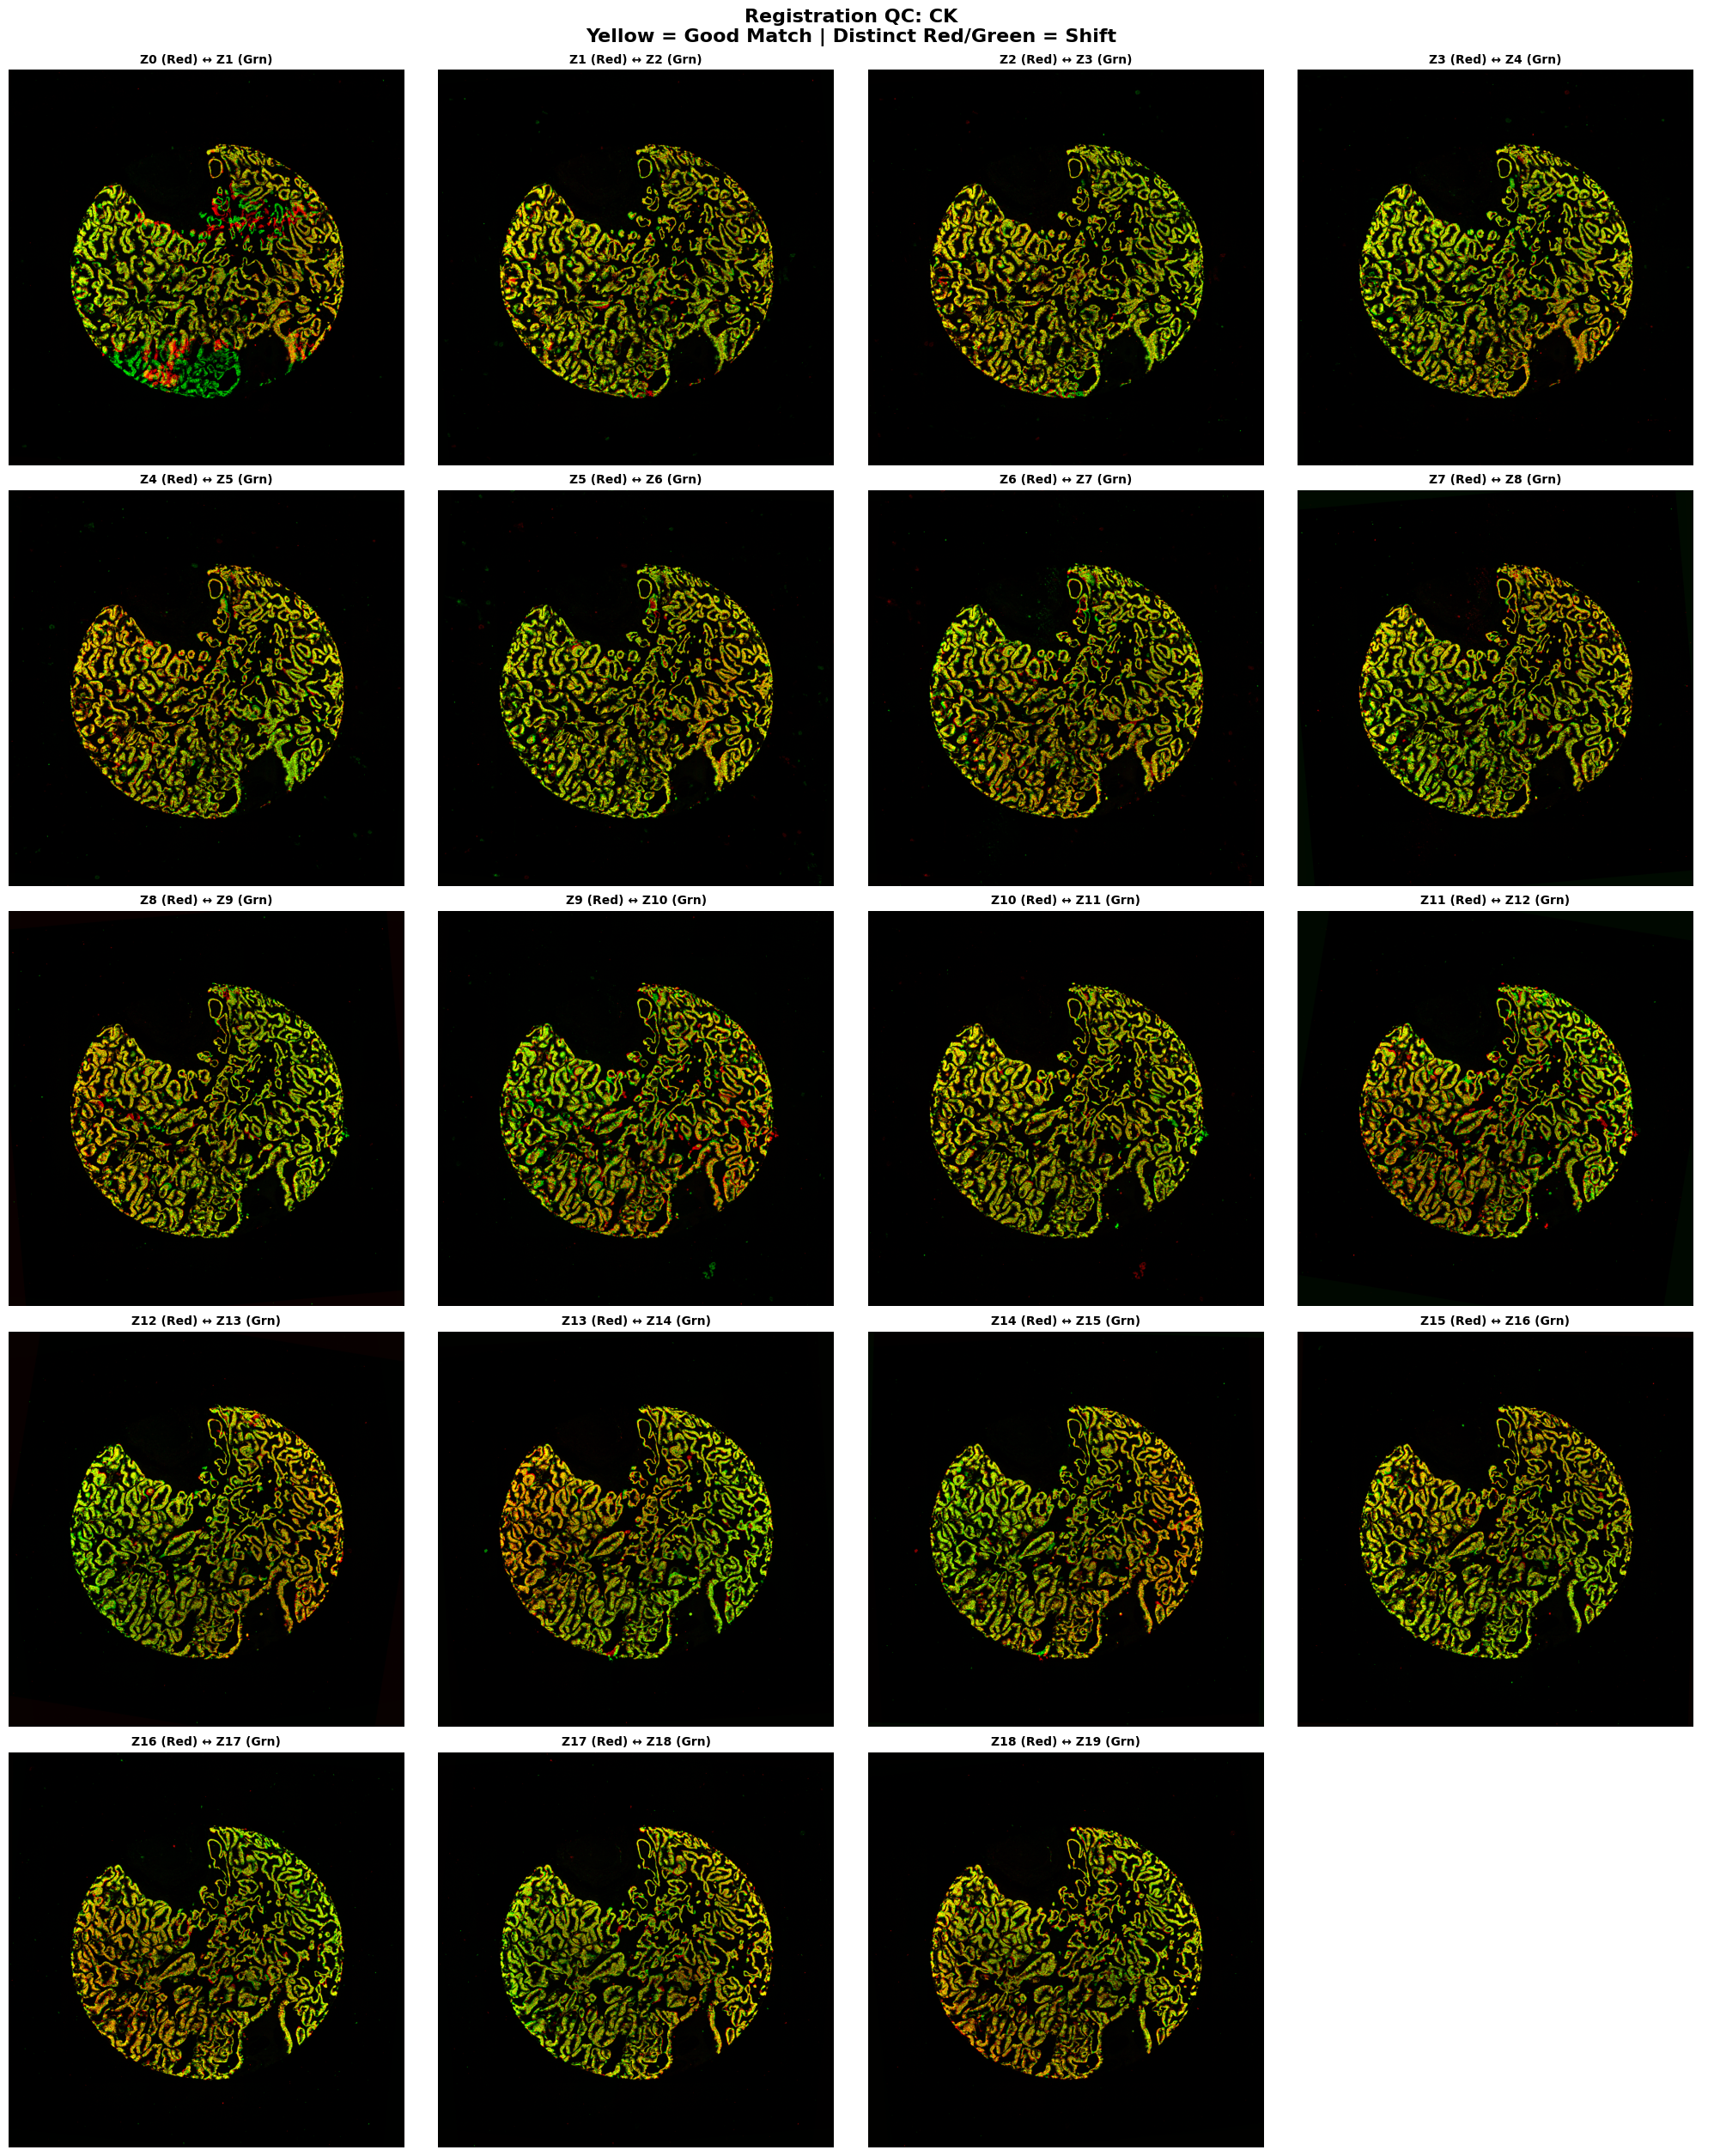

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tifffile

# 1. Setup Data
REGISTERED_DIR = OUTPUT_FOLDER  

# Downsample factor for Fiji visualization (4 = 1/16th file size)
DOWNSAMPLE_FACTOR = 4 

# Output filename
OUTPUT_FILENAME = f"Final_Aligned_Core_11_Downsampled_x{DOWNSAMPLE_FACTOR}.ome.tiff"
MASTER_OUTPUT = os.path.join(REGISTERED_DIR, OUTPUT_FILENAME)
# Ensure we are using the volume_stack
if 'volume_stack' not in locals():
    print("Loading downsampled stack from disk...")
    # Make sure MASTER_OUTPUT points to your downsampled .ome.tiff file
    vol = tifffile.imread(MASTER_OUTPUT) 
else:
    vol = volume_stack

print(f"Data Loaded. Shape: {vol.shape} (Z, C, Y, X)")

# 2. Configuration
channel_names = ['DAPI', 'CD31', 'GAP43', 'NFP', 'CD3', 'CD163', 'CK', 'AF']

# We will use 'CK' (Index 6) because it shows large tissue structures clearly
check_channel = 6 

print(f"\nCHECKING ALL CONSECUTIVE Z-SLICE PAIRS")
print(f"Using Channel [{check_channel}]: {channel_names[check_channel]}")

# 3. Create Pairs
n_slices = vol.shape[0]
all_pairs = [(i, i+1) for i in range(n_slices - 1)]
print(f"Will check {len(all_pairs)} consecutive pairs (Z0-Z1, Z1-Z2, etc.)\n")

# 4. Visualization Logic
# Calculate grid layout (Up to 4 columns)
n_pairs = len(all_pairs)
n_cols = min(4, n_pairs) 
n_rows = (n_pairs + n_cols - 1) // n_cols

# Create figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows), constrained_layout=True)

# Flatten axes for easy iteration
if n_pairs == 1: 
    axes = [axes]
axes_flat = axes.flatten() if isinstance(axes, np.ndarray) else axes

for idx, (z1, z2) in enumerate(all_pairs):
    # Get slices for the chosen channel
    slice1 = vol[z1, check_channel, :, :]
    slice2 = vol[z2, check_channel, :, :]
    
    # Normalize robustly (Clip top 1% outliers to avoid washout)
    def norm(x):
        p99 = np.percentile(x, 99)
        if p99 == 0: return x 
        return np.clip(x / p99, 0, 1)
    
    s1_norm = norm(slice1)
    s2_norm = norm(slice2)
    
    # Create overlay: 
    # RED   = Slice Z (Previous)
    # GREEN = Slice Z+1 (Next)
    # Result: Yellow means perfect alignment
    overlay = np.dstack((s1_norm, s2_norm, np.zeros_like(s1_norm)))
    
    # Display
    ax = axes_flat[idx]
    ax.imshow(overlay)
    ax.set_title(f'Z{z1} (Red) ↔ Z{z2} (Grn)', fontsize=10, fontweight='bold')
    ax.axis('off')

# Hide unused subplots
for idx in range(len(all_pairs), len(axes_flat)):
    axes_flat[idx].axis('off')

plt.suptitle(f'Registration QC: {channel_names[check_channel]}\n' +
             f'Yellow = Good Match | Distinct Red/Green = Shift',
             fontsize=16, fontweight='bold')

plt.show()